# Bands of a photonic crystal slab

In this short example, we will demonstrate how Legume can be used to compute the bands of a photonic crystal slab. We will consider a slab design that is very close to one from the book [Molding the Flow of Light](http://ab-initio.mit.edu/book/).

First we will import the `legume` package:

In [1]:
import legume

We will then define the parameters of our structure: $D$ is the thickness of the slab, $r$ is the radius of the air hole, and `epsr` is the permittivity.

In [2]:
D = 0.6
r = 0.3
epsr = 12.0

Next, we construct the lattice, the photonic crystal object, and the GME object:

In [3]:
lattice = legume.Lattice('hexagonal')
phc = legume.PhotCryst(lattice)
phc.add_layer(d=D, eps_b=epsr)
phc.layers[-1].add_shape(legume.Circle(eps=1.0, r=r))
gme = legume.GuidedModeExp(phc, gmax=6)

We can then use the `legume.viz` module to visualize our photonic crystal slab across three planes through the unit cell:

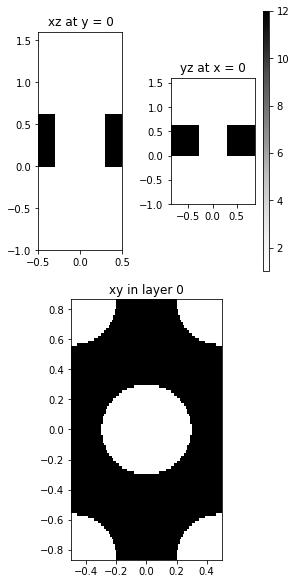

In [4]:
legume.viz.structure(phc)

Finally, we can solve for the bands of the photonic crystal. Note that here we are solving for only the modes with *TE-like* polarization because we have `gmode_inds=[0]`.

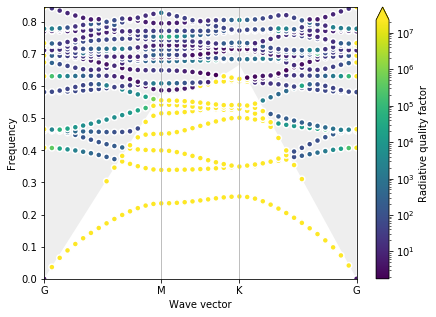

In [5]:
path = lattice.bz_path(['G', 'M', 'K', 'G'], [15, 10, 15])
gme.run(kpoints=path['kpoints'],
        gmode_inds=[0, 3],
        numeig=20,
        verbose=False)
fig, ax = plt.subplots(1, figsize = (7, 5))
legume.viz.bands(gme, figsize=(5,5), Q=True, ax=ax)
ax.set_xticks(path['indexes'])
ax.set_xticklabels(path['labels'])
ax.xaxis.grid('True')

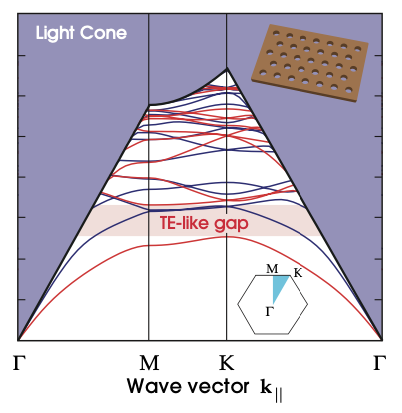

We observe excellent agreement with the bands shown in the text book (red lines).